# 0. Cloning the files from my Github + Starting Jupyter
1. Open terminal
2. cd to your folder (cd "your name")
3. Clone the repo - git clone https://github.com/fhorrobin/UTSC-Comp-Phys.git
4. ls to see the contents on folder. Should now see repo folder
5. cd to repo folder (cd UTSC-Comp-Phys)
6. Start jupyter here (jupyter notebook)
7. Make new notebook to open file

In [3]:
# Import required packages as usual
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
%matplotlib inline

# 1. File IO
 - Basic syntax:

```Python
# We open the file. file is now a file handle
file = open('filename', 'r')

# We will operate on the file here

# Always close the file at the end
file.close()
```

- Several ways to read a file. Today we will read it line by line using a loop
- Same form as loops we have used in previous weeks since files are iterable:

```Python
for line in file:
    # Do something with line - line is a string containing that line from the file
```

- We can also read the whole file to a list of strings (1 string per line) using:

    ```file.readlines()```

- To read a single line we use: ```file.readline()```. Python remembers where we are in the file. This is useful to read past a line we do not want to include (ie a header)

## Task: We will read the data from the file with planet data into np arrays

- The column structure of the file is: 
   ```
   orbit, error, a, e
   ```
- The first two lines are headers.

### Steps to read:
1. Read past first 2 lines
2. Loop through and read each line
3. Split the line
4. Append each item to a different list
5. Convert the list to numpy arrays

In [4]:
# Define the general function to read a file of this form
def read_data(filename):
    """
    Given str for name of the file, return a np array for each
    column of the file.
    """
    file = open(filename, 'r')
    
    # Read past first 2 lines (header)
    file.readline()
    file.readline()
    
    orbit = []
    err = []
    a = []
    e = []
    
    # Iterate through each line
    for line in file:
        line = line.split()
        
        # Convert each item to float and append to list
        orbit.append(float(line[0]))
        err.append(float(line[1]))
        a.append(float(line[2]))
        e.append(float(line[3]))
        
    # Now close the file
    file.close()
    
    # Convert the lists to np array
    orbit = np.array(orbit)
    err = np.array(err)
    a = np.array(a)
    e = np.array(e)
    
    # Return the 4 lists
    return orbit, err, a, e

In [5]:
# Now use the function to read the data
# These are now np arrays containing the returned values
orbit, err, a, e = read_data('data1.txt')

# 2. Visualizing the Data
We will do this more formally today. We will produce 3 plots in matplotlib for each of the data arrays plotted vs orbit number. We will then try out some other plots to see other things we can do (ie $\dot a$ and e vs a)

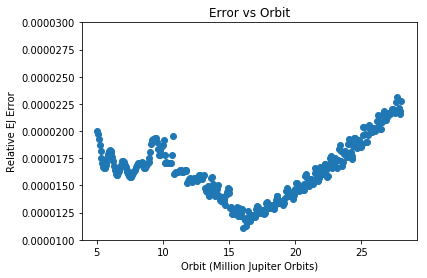

In [7]:
# When using matplotlib we should first create a figure and axis system. Not required if
# Just quickly doing plots like we did last week but it is best practice for more
# Professional data analysis plus allows for more flexible formatting

# Create a figure/axis system
fig, ax = plt.subplots(1,1)

# Titles and labels
ax.set_title("Error vs Orbit")
ax.set_xlabel("Orbit (Million Jupiter Orbits)")
ax.set_ylabel("Relative EJ Error")

# Set axis range
ax.set_ylim(0.00001, 0.00003)

# Plot as scatter data
ax.scatter(orbit, err)

This data is fairly messy. But let's try to fit it anyways.
- First we tried 2nd order polynomial ($y = Ax^2 + Bx + C$)
- We settled with 4th order ($y = Ax^4 + Bx^3 + Cx^2 + Dx + E$)

Note that this is for example purposes. In reality, this data does not gain more physical data by fitting it since we are just seeing small noise in the error.

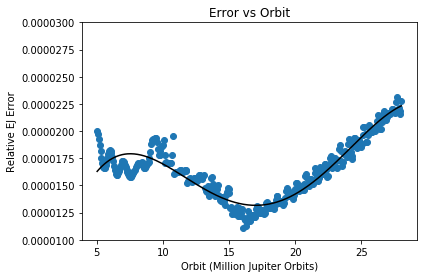

In [9]:
# Let's define fit function
def fitfunc(p, x):
    return p[0]*x**4 + p[1]*x**3 + p[2]*x**2 + p[3]*x + p[4]

def errfunc(p, x, y):
    return fitfunc(p, x) - y

p0 = [1., 1., 1., 1., 1.]

p1, success = optimize.leastsq(errfunc, p0[:], args=(orbit, err))

fig, ax = plt.subplots(1,1)

ax.set_title("Error vs Orbit")
ax.set_xlabel("Orbit (Million Jupiter Orbits)")
ax.set_ylabel("Relative EJ Error")
ax.set_ylim(0.00001, 0.00003)

ax.scatter(orbit, err)

# Plot the fit function (k- means black(color code k) line)
ax.plot(orbit, fitfunc(p1, orbit), 'k-')

Maybe not the best bit, but we get the general trend of the data. Let's try the other results. They are somewhat more interesting. To see how subplots work, let's plot a and e on same subplot

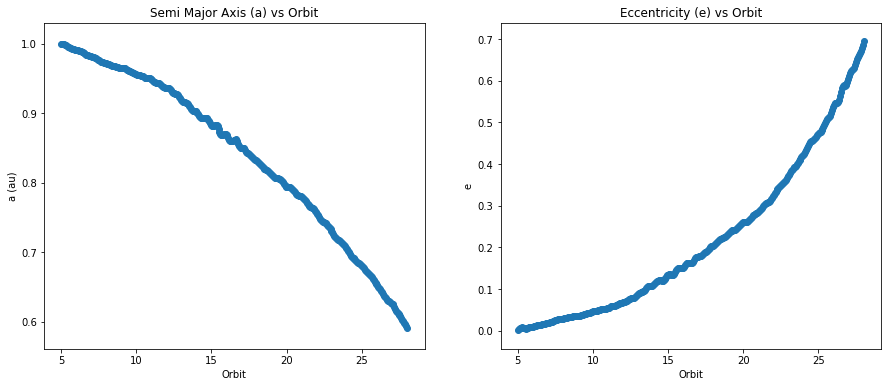

In [14]:
# 2 Subplots in a single plot
fig, ax = plt.subplots(1,2, figsize=[15,6])

ax[0].set_title("Semi Major Axis (a) vs Orbit")
ax[1].set_title("Eccentricity (e) vs Orbit")

ax[0].set_xlabel("Orbit")
ax[1].set_xlabel("Orbit")

ax[0].set_ylabel("a (au)")
ax[1].set_ylabel("e")

ax[0].scatter(orbit, a)
ax[1].scatter(orbit, e)

Let's try fitting this. What do you suggest we fit this with?

In [15]:
def fitfunc(p, x):
    return p[0]*x**2 + p[1]*x + p[2]

def errfunc(p, x, y):
    return fitfunc(p, x) - y

p0 = [1., 1., 1.]

# Fit both of the fucntions
p1, success = optimize.leastsq(errfunc, p0[:], args=(orbit, a))
p2, success = optimize.leastsq(errfunc, p0[:], args=(orbit, e))

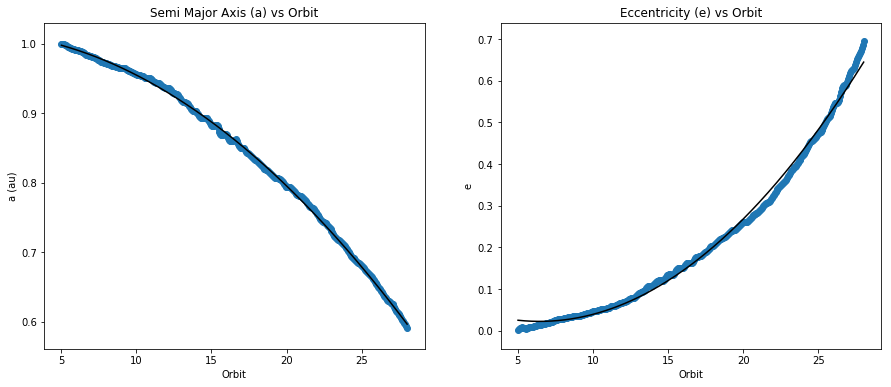

In [16]:
fig, ax = plt.subplots(1,2, figsize=[15,6])

ax[0].set_title("Semi Major Axis (a) vs Orbit")
ax[1].set_title("Eccentricity (e) vs Orbit")

ax[0].set_xlabel("Orbit")
ax[1].set_xlabel("Orbit")

ax[0].set_ylabel("a (au)")
ax[1].set_ylabel("e")

ax[0].scatter(orbit, a)
ax[1].scatter(orbit, e)

ax[0].plot(orbit, fitfunc(p1, orbit), 'k-')
ax[1].plot(orbit, fitfunc(p2, orbit), 'k-')

Now break/time to play around with the data on your own or ask questions. We can also try some other plots like e vs a. I will leave this as an extra samle if you want to play around with it.

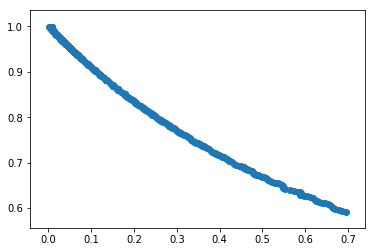

In [17]:
fig, ax = plt.subplots(1,1)
ax.scatter(e, a)

In [18]:
def fitfunc(p, x):
    return p[0] * x**2 + p[1] * x + p[2]

def errfun(p, x, y):
    return fitfunc(p, x) - y

p0 = [1., 1., 1.]

p1, success = optimize.leastsq(errfunc, p0[:], args=(e, a))

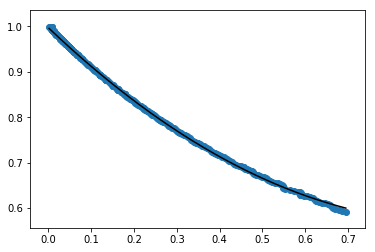

In [19]:
fig, ax = plt.subplots(1,1)
ax.scatter(e, a)
ax.plot(e, fitfunc(p1, e), 'k-')

Try fitting the curves or other data you have with different functions. The power of this method is that you can fit any function you can think of.